In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter

In [42]:
df = pd.read_csv("./Service_request.csv",dtype ={41:str},low_memory=False)

#### Original dataFrame

In [44]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,57253155,04/08/2023 12:00:00 PM,NaN,DSNY,Department of Sanitation,Derelict Vehicles,Derelict Vehicles,Street,11433,111-02 160 STREET,...,NaN,NaN,40.690845,-73.789726,"(40.69084533757663, -73.78972563627649)",24668,41.0,3.0,46.0,71.0
1,57257588,04/08/2023 01:18:48 AM,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,10011,162 WEST 13 STREET,...,NaN,NaN,40.737372,-73.999029,"(40.737371751212834, -73.99902932027611)",12074,57.0,4.0,10.0,3.0
2,57251441,04/08/2023 12:21:00 AM,NaN,DOT,Department of Transportation,Traffic Signal Condition,Pedestrian Signal,NaN,11101,NaN,...,NaN,NaN,40.755233,-73.941238,"(40.755233318745795, -73.94123827336074)",16858,39.0,3.0,33.0,72.0
3,57251434,04/08/2023 12:01:00 AM,NaN,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,11220,NaN,...,NaN,NaN,40.639321,-74.023550,"(40.63932066833335, -74.02355033576893)",18180,10.0,2.0,7.0,41.0
4,57250915,04/08/2023 12:00:00 AM,04/08/2023 12:30:00 AM,DOT,Department of Transportation,Traffic Signal Condition,LED Lense,NaN,10023,NaN,...,NaN,NaN,40.778096,-73.978293,"(40.77809623035551, -73.97829258153799)",12420,20.0,4.0,19.0,12.0


In [45]:
# Removing the Unique Key attribute
dropFeature = ["Agency","Address Type","Unique Key","Closed Date","Incident Address","Cross Street 1","Cross Street 2","Intersection Street 1","Intersection Street 2","Facility Type","Status","Due Date","Resolution Description","Resolution Action Updated Date","Community Board","BBL","Borough","X Coordinate (State Plane)","Y Coordinate (State Plane)","Open Data Channel Type","Park Facility Name","Park Borough","Taxi Company Borough","Taxi Pick Up Location","Bridge Highway Name","Bridge Highway Direction","Road Ramp","Bridge Highway Segment","Latitude","Longitude","Location","Community Districts","Borough Boundaries","City Council Districts","Police Precincts","Incident Zip"]
for feature in dropFeature:
    df.pop(feature)

#### Updated dataFrame

In [46]:
df.head()

,Created Date,Agency Name,Complaint Type,Descriptor,Location Type,Street Name,City,Landmark,Vehicle Type,Zip Codes
0,04/08/2023 12:00:00 PM,Department of Sanitation,Derelict Vehicles,Derelict Vehicles,Street,160 STREET,JAMAICA,NaN,NaN,24668
1,04/08/2023 01:18:48 AM,Department of Sanitation,Graffiti,Graffiti,Mixed Use,WEST 13 STREET,NEW YORK,NaN,NaN,12074
2,04/08/2023 12:21:00 AM,Department of Transportation,Traffic Signal Condition,Pedestrian Signal,NaN,NaN,QUEENS,NaN,NaN,16858
3,04/08/2023 12:01:00 AM,Department of Transportation,Traffic Signal Condition,Controller,NaN,NaN,BROOKLYN,NaN,NaN,18180
4,04/08/2023 12:00:00 AM,Department of Transportation,Traffic Signal Condition,LED Lense,NaN,NaN,MANHATTAN,NaN,NaN,12420


In [31]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

<Axes: xlabel='Agency', ylabel='count'>

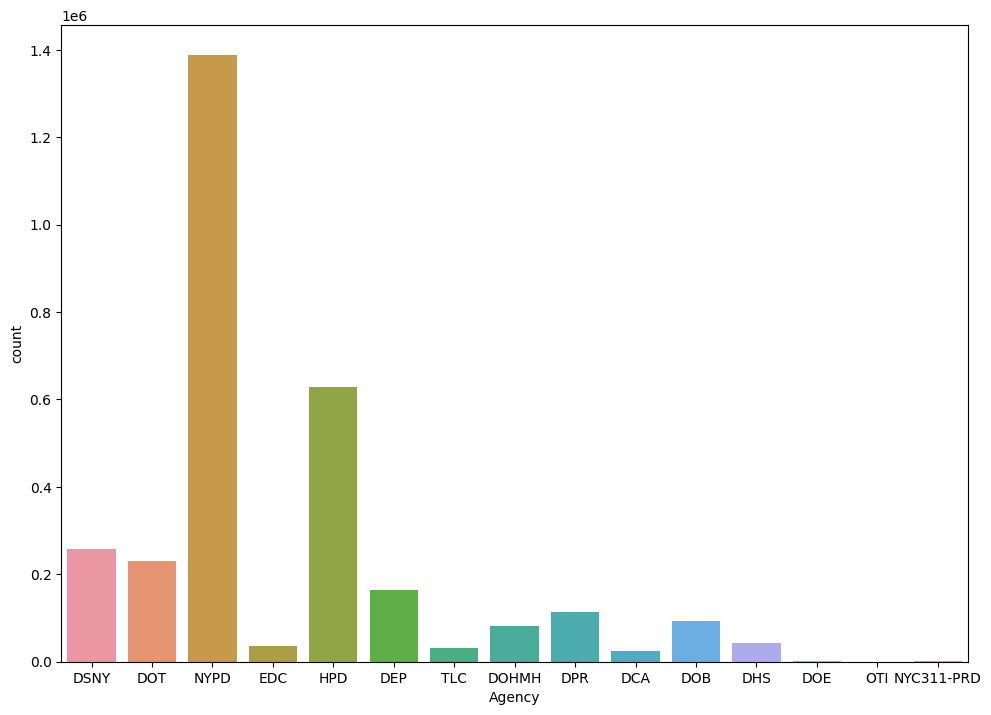

In [32]:
sns.countplot(data=df, x="Agency")


<Axes: xlabel='Agency Name', ylabel='count'>

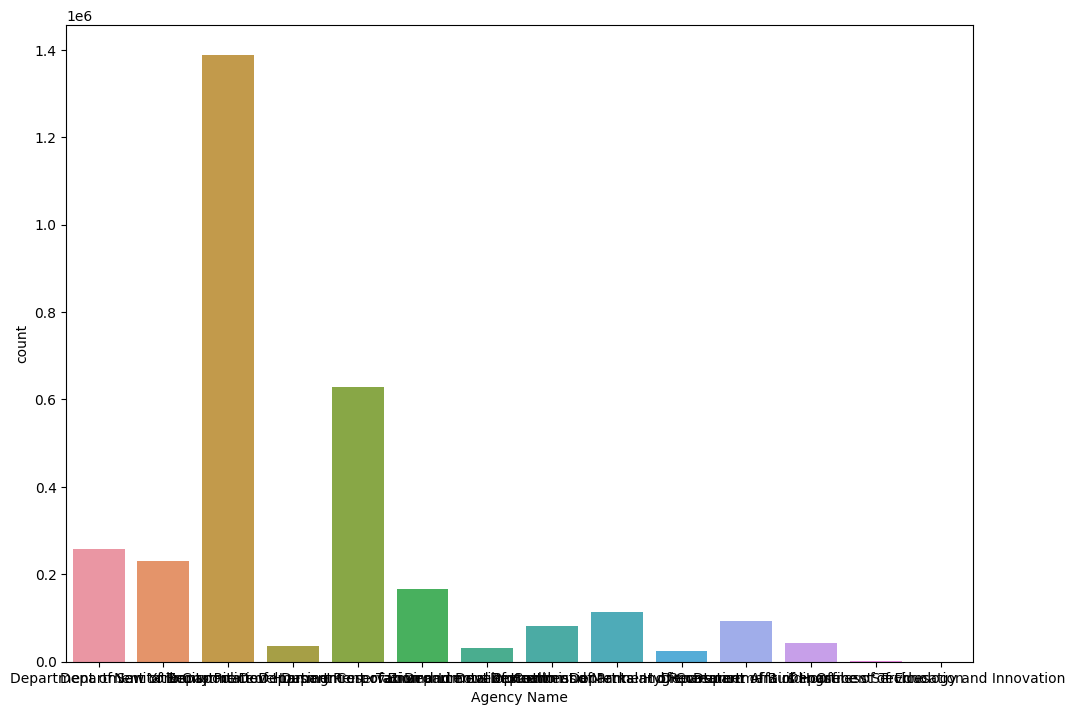

In [33]:
sns.countplot(data=df, x="Agency Name")


<Axes: xlabel='Complaint Type', ylabel='count'>

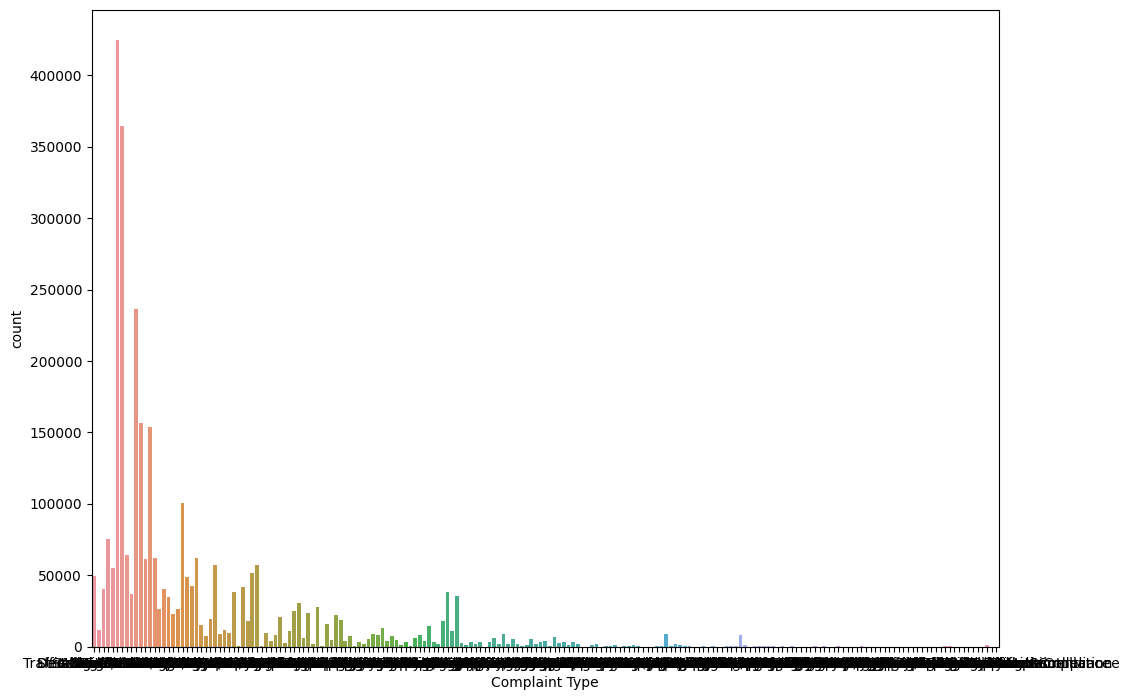

In [34]:
sns.countplot(data=df, x="Complaint Type")


<Axes: xlabel='Zip Codes', ylabel='count'>

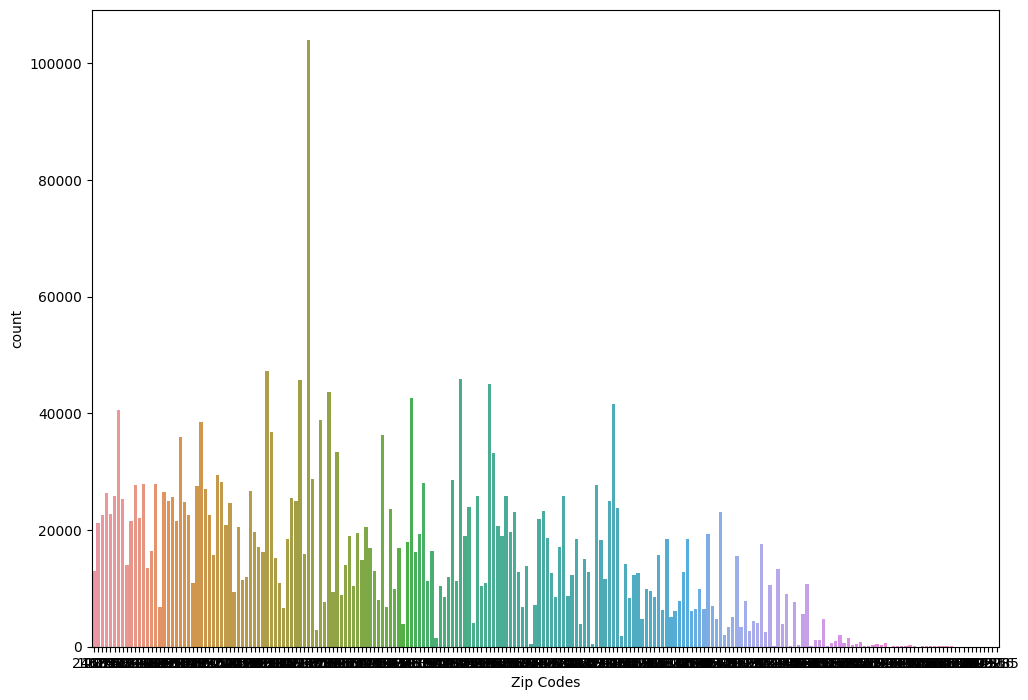

In [35]:
sns.countplot(data=df, x="Zip Codes")


In [47]:
df['Created Date'] = pd.to_datetime(df['Created Date'], infer_datetime_format=True)

In [48]:
df['day_of_week'] = df['Created Date'].dt.dayofweek

In [49]:
df['month'] = df['Created Date'].dt.month

In [50]:
df.head()

,Created Date,Agency Name,Complaint Type,Descriptor,Location Type,Street Name,City,Landmark,Vehicle Type,Zip Codes,day_of_week,month
0,2023-04-08 12:00:00,Department of Sanitation,Derelict Vehicles,Derelict Vehicles,Street,160 STREET,JAMAICA,NaN,NaN,24668,5,4
1,2023-04-08 01:18:48,Department of Sanitation,Graffiti,Graffiti,Mixed Use,WEST 13 STREET,NEW YORK,NaN,NaN,12074,5,4
2,2023-04-08 12:21:00,Department of Transportation,Traffic Signal Condition,Pedestrian Signal,NaN,NaN,QUEENS,NaN,NaN,16858,5,4
3,2023-04-08 12:01:00,Department of Transportation,Traffic Signal Condition,Controller,NaN,NaN,BROOKLYN,NaN,NaN,18180,5,4
4,2023-04-08 12:00:00,Department of Transportation,Traffic Signal Condition,LED Lense,NaN,NaN,MANHATTAN,NaN,NaN,12420,5,4


<Axes: xlabel='day_of_week', ylabel='count'>

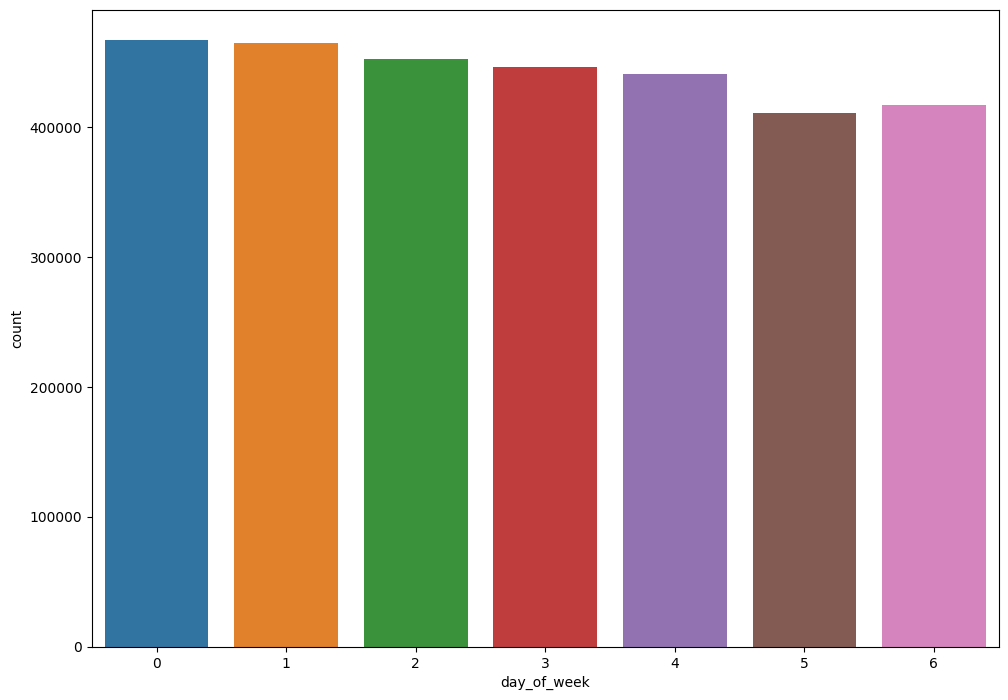

In [40]:
sns.countplot(data=df, x="day_of_week")


<Axes: xlabel='month', ylabel='count'>

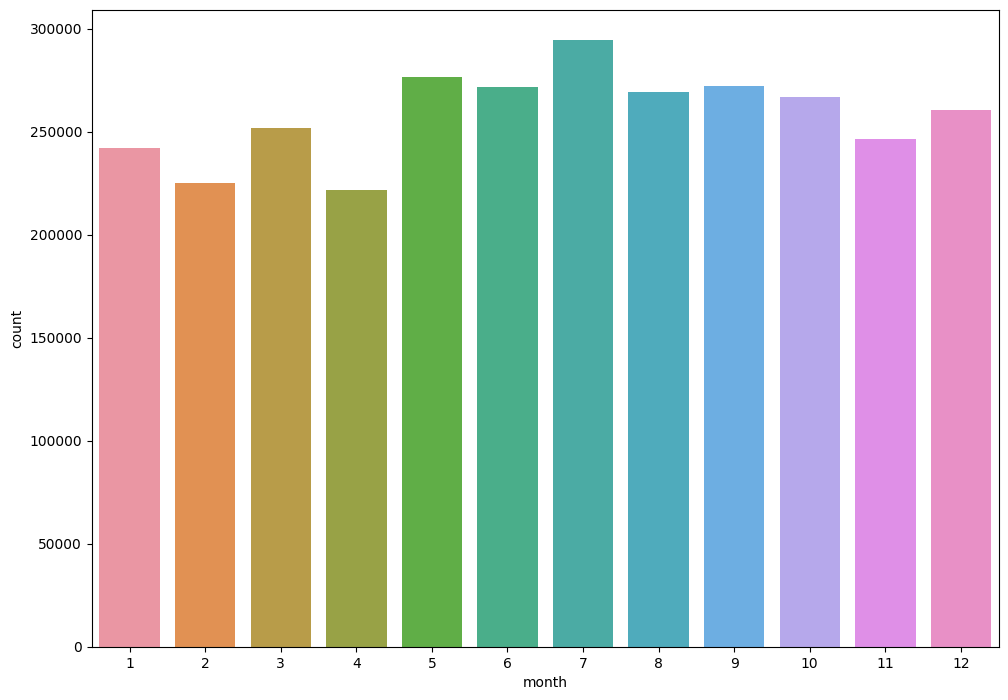

In [41]:
sns.countplot(data=df, x="month")


In [51]:
dayList = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
monthList = ['','January','February','March','April','May','June','July','August','September','October','November','December']

In [52]:
df['day_of_week'] = df['day_of_week'].apply(lambda x: dayList[x])


In [53]:
df.head()

,Created Date,Agency Name,Complaint Type,Descriptor,Location Type,Street Name,City,Landmark,Vehicle Type,Zip Codes,day_of_week,month
0,2023-04-08 12:00:00,Department of Sanitation,Derelict Vehicles,Derelict Vehicles,Street,160 STREET,JAMAICA,NaN,NaN,24668,Saturday,4
1,2023-04-08 01:18:48,Department of Sanitation,Graffiti,Graffiti,Mixed Use,WEST 13 STREET,NEW YORK,NaN,NaN,12074,Saturday,4
2,2023-04-08 12:21:00,Department of Transportation,Traffic Signal Condition,Pedestrian Signal,NaN,NaN,QUEENS,NaN,NaN,16858,Saturday,4
3,2023-04-08 12:01:00,Department of Transportation,Traffic Signal Condition,Controller,NaN,NaN,BROOKLYN,NaN,NaN,18180,Saturday,4
4,2023-04-08 12:00:00,Department of Transportation,Traffic Signal Condition,LED Lense,NaN,NaN,MANHATTAN,NaN,NaN,12420,Saturday,4


In [54]:
df['month'] = df['month'].apply(lambda x: monthList[x])


In [55]:
df.head()

,Created Date,Agency Name,Complaint Type,Descriptor,Location Type,Street Name,City,Landmark,Vehicle Type,Zip Codes,day_of_week,month
0,2023-04-08 12:00:00,Department of Sanitation,Derelict Vehicles,Derelict Vehicles,Street,160 STREET,JAMAICA,NaN,NaN,24668,Saturday,April
1,2023-04-08 01:18:48,Department of Sanitation,Graffiti,Graffiti,Mixed Use,WEST 13 STREET,NEW YORK,NaN,NaN,12074,Saturday,April
2,2023-04-08 12:21:00,Department of Transportation,Traffic Signal Condition,Pedestrian Signal,NaN,NaN,QUEENS,NaN,NaN,16858,Saturday,April
3,2023-04-08 12:01:00,Department of Transportation,Traffic Signal Condition,Controller,NaN,NaN,BROOKLYN,NaN,NaN,18180,Saturday,April
4,2023-04-08 12:00:00,Department of Transportation,Traffic Signal Condition,LED Lense,NaN,NaN,MANHATTAN,NaN,NaN,12420,Saturday,April


In [56]:
df.pop('Created Date')

0         2023-04-08 12:00:00
1         2023-04-08 01:18:48
2         2023-04-08 12:21:00
3         2023-04-08 12:01:00
4         2023-04-08 12:00:00
                  ...        
3099024   2022-04-09 11:57:17
3099025   2022-04-09 11:57:02
3099026   2022-04-09 11:57:00
3099027   2022-04-09 11:57:00
3099028   2022-04-09 11:56:21
Name: Created Date, Length: 3099029, dtype: datetime64[ns]

In [57]:
df.head()

,Agency Name,Complaint Type,Descriptor,Location Type,Street Name,City,Landmark,Vehicle Type,Zip Codes,day_of_week,month
0,Department of Sanitation,Derelict Vehicles,Derelict Vehicles,Street,160 STREET,JAMAICA,NaN,NaN,24668,Saturday,April
1,Department of Sanitation,Graffiti,Graffiti,Mixed Use,WEST 13 STREET,NEW YORK,NaN,NaN,12074,Saturday,April
2,Department of Transportation,Traffic Signal Condition,Pedestrian Signal,NaN,NaN,QUEENS,NaN,NaN,16858,Saturday,April
3,Department of Transportation,Traffic Signal Condition,Controller,NaN,NaN,BROOKLYN,NaN,NaN,18180,Saturday,April
4,Department of Transportation,Traffic Signal Condition,LED Lense,NaN,NaN,MANHATTAN,NaN,NaN,12420,Saturday,April


In [50]:
len(df)

3099029

In [58]:
smaller_df = df.sample(100000)

In [58]:
df.to_csv('./INTEGRATED_DATASET.csv')

In [59]:
smaller_df.to_csv('./INTEGRATED-DATASET-SMALL.csv',index=False)

In [6]:
newdf = pd.read_csv('INTEGRATED-DATASET-SMALL.csv')

In [10]:
newdf.pop("Unnamed: 0")

0            0
1            1
2            2
3            3
4            4
         ...  
49995    49995
49996    49996
49997    49997
49998    49998
49999    49999
Name: Unnamed: 0, Length: 50000, dtype: int64

In [12]:
newdf.to_csv('./INTEGRATED-DATASET-SMALL.csv',index=False)

In [11]:
newdf.head()

,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Street Name,Address Type,City,Zip Codes,day_of_week,month
0,DSNY,Department of Sanitation,Derelict Vehicles,Derelict Vehicles,Street,160 STREET,ADDRESS,JAMAICA,24668.0,Saturday,April
1,DSNY,Department of Sanitation,Graffiti,Graffiti,Mixed Use,WEST 13 STREET,ADDRESS,NEW YORK,12074.0,Saturday,April
2,DOT,Department of Transportation,Traffic Signal Condition,Pedestrian Signal,NaN,NaN,INTERSECTION,QUEENS,16858.0,Saturday,April
3,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,NaN,INTERSECTION,BROOKLYN,18180.0,Saturday,April
4,DOT,Department of Transportation,Traffic Signal Condition,LED Lense,NaN,NaN,INTERSECTION,MANHATTAN,12420.0,Saturday,April


In [3]:
newdf.values[0]

array([0, 'DSNY', 'Department of Sanitation', 'Derelict Vehicles',
       'Derelict Vehicles', 'Street', '160 STREET', 'ADDRESS', 'JAMAICA',
       nan, 24668.0, 'Saturday', 'April'], dtype=object)

In [70]:
newdf.columns

Index(['Unnamed: 0', 'Agency', 'Agency Name', 'Complaint Type', 'Descriptor',
       'Location Type', 'Street Name', 'Address Type', 'City', 'Landmark',
       'Zip Codes', 'day_of_week', 'month'],
      dtype='object')

In [71]:
newdf.pop('Unnamed: 0')

0            0
1            1
2            2
3            3
4            4
         ...  
49995    49995
49996    49996
49997    49997
49998    49998
49999    49999
Name: Unnamed: 0, Length: 50000, dtype: int64

In [72]:
newdf.values[0]

array(['DSNY', 'Department of Sanitation', 'Derelict Vehicles',
       'Derelict Vehicles', 'Street', '160 STREET', 'ADDRESS', 'JAMAICA',
       nan, 24668.0, 'Saturday', 'April'], dtype=object)